<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━╸━━━━━━━━━━━━━━━╸━━━━━━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
Tesla = yf.Ticker("TSLA")
Tesla

yfinance.Ticker object <TSLA>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
tesla_data = Tesla.history(period="max")
tesla_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2024-03-12,177.770004,179.429993,172.410004,177.539993,87391700,0,0.0
2024-03-13,173.050003,176.050003,169.149994,169.479996,106524500,0,0.0
2024-03-14,167.770004,171.169998,160.509995,162.500000,126325700,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
tesla_data.reset_index(inplace=True)

In [11]:
print(tesla_data)

      level_0  index       Date        Open        High         Low  \
0           0      0 2010-06-29    1.266667    1.666667    1.169333   
1           1      1 2010-06-30    1.719333    2.028000    1.553333   
2           2      2 2010-07-01    1.666667    1.728000    1.351333   
3           3      3 2010-07-02    1.533333    1.540000    1.247333   
4           4      4 2010-07-06    1.333333    1.333333    1.055333   
...       ...    ...        ...         ...         ...         ...   
3448     3448   3448 2024-03-12  177.770004  179.429993  172.410004   
3449     3449   3449 2024-03-13  173.050003  176.050003  169.149994   
3450     3450   3450 2024-03-14  167.770004  171.169998  160.509995   
3451     3451   3451 2024-03-15  163.160004  165.179993  160.759995   
3452     3452   3452 2024-03-18  170.158997  174.720001  165.900101   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500          0           0.0  
1       1.588667  257806500          

,Date,Revenue


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [135]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize an empty DataFrame to store the data
tesla_revenue = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

# Find the table containing the revenue data
table = soup.find("table")

# Iterate over the rows within the table
for row in table.find_all("tr")[1:]:  # Skip the header row
    col = row.find_all("td")
    if len(col) == 7:  # Ensure that the row has all expected columns
        date = col[0].text
        open_price = col[1].text
        high_price = col[2].text
        low_price = col[3].text
        close_price = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        
        # Append the data of each row to the DataFrame
        tesla_revenue = tesla_revenue.append({
            "Date": date,
            "Open": open_price,
            "High": high_price,
            "Low": low_price,
            "Close": close_price,
            "Adj Close": adj_close,
            "Volume": volume
        }, ignore_index=True)

# Display the first few rows of the DataFrame
print(tesla_revenue.head())

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [136]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the revenue data
table = soup.find("table")

# Print the table to inspect its structure
print(table)

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-align:center">2013</td

In [41]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


Execute the following lines to remove an null or empty strings in the Revenue column.


In [43]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [62]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [45]:
import yfinance as yf

In [46]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [47]:
gme_data = gme.history(period="max")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [48]:
gme_data.reset_index(inplace=True)
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666417  1.666417  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [49]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4

import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

data  = requests.get(url).text



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

Parse the html data using `beautiful_soup`.


In [52]:
soup = BeautifulSoup(data, 'lxml')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [59]:
read_html_pandas_data = pd.read_html(url)

read_html_pandas_data = pd.read_html(str(soup))

gme_dataframe = read_html_pandas_data[1]
gme_dataframe.columns = ["Date", "Revenue"]
gme_dataframe.head()


,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [60]:
gme_dataframe.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


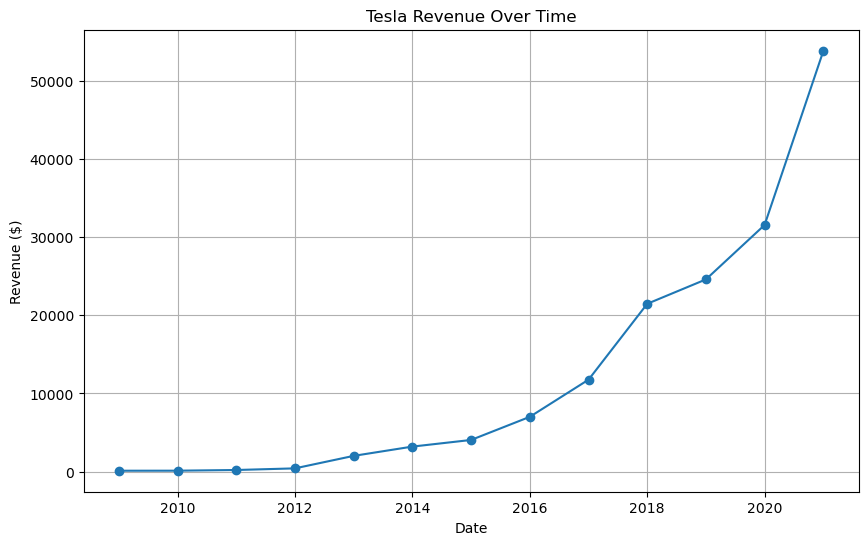

In [120]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime type
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Convert 'Revenue' column to numeric type by removing commas and dollar signs
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plot the revenue data
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

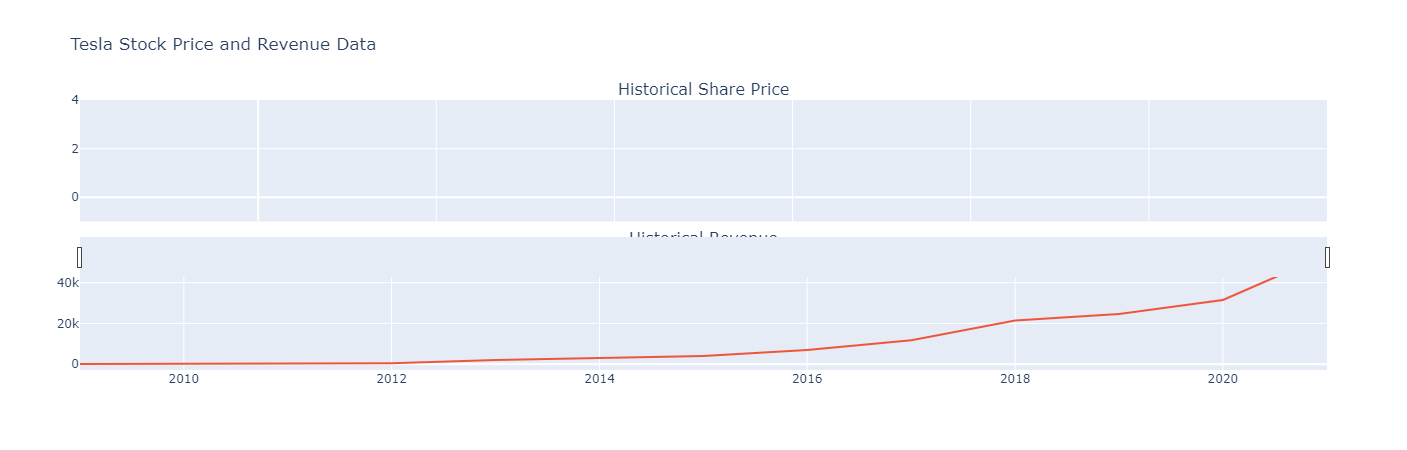

In [124]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    # Create a new subplot
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing=0.1)
    
    # Plot stock price data
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Revenue'], mode='lines', name='Share Price'),
                  row=1, col=1)
    
    # Plot revenue data
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines', name='Revenue'),
                  row=2, col=1)
    
    # Update layout
    fig.update_layout(title_text=f"{stock} Stock Price and Revenue Data",
                      xaxis_rangeslider_visible=True)
    
    # Show plot
    fig.show()

# Call the make_graph function with the provided data
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [126]:
def make_graph(stock_data, revenue_data, stock, title):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=title,  # Use the provided title parameter for the graph title
                      xaxis_rangeslider_visible=True)
    fig.show()


In [128]:
 make_graph(tesla_data, tesla_revenue, 'Tesla')

TypeError: make_graph() missing 1 required positional argument: 'title'

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [101]:
def make_graph(stock_data, revenue_data, stock, title):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=title,  # Use the provided title parameter for the graph title
                      xaxis_rangeslider_visible=True)
    fig.show()

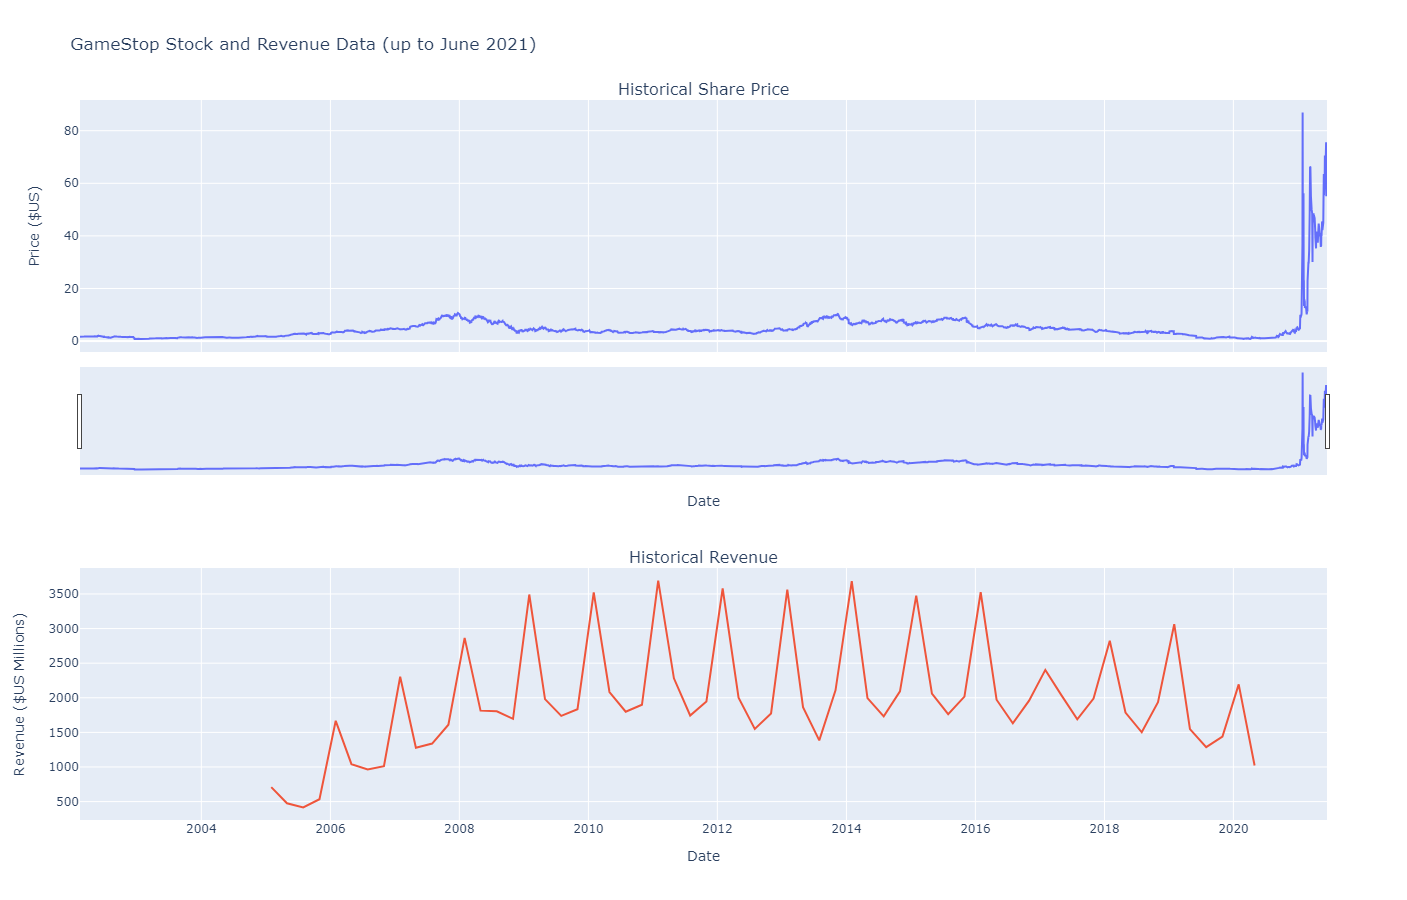

In [102]:
  make_graph(gme_data, gme_dataframe, 'GameStop', 'GameStop Stock and Revenue Data (up to June 2021)')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
